In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1_with_loggers.nc'
ds=xr.open_dataset(filename_loggers_out_nc)


In [1]:
#ds.sea_water_temperature_logger4_mean[0:1000]

In [21]:

#da.sel(time=slice('2000-01-01', '2000-01-02'))
#dataset.TEMP_IR_MEAN[0,1:10000].plot()
#dataset.TEMP_CTD_MEAN[0,1:10000].plot()
#tem=dataset.sea_water_temperature_logger1_mean[0,1:10000]-273.15
#tem.plot()


In [48]:
ds2=ds.set_index(ds['TIME'])

In [2]:
#dstem = pd.to_datetime(ds['TIME'])
#ds2.info


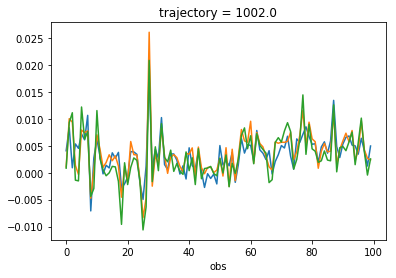

In [34]:
ds_sel=ds.sel(obs=slice(3000, 3100)) #dataset.TIME)
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger2_mean
dif.plot()
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger3_mean
dif.plot()
dif=ds_sel.sea_water_temperature_logger1_mean-ds_sel.sea_water_temperature_logger4_mean
dif.plot()


In [29]:
ds_sel.TIME[0]

<xarray.DataArray 'TIME' (obs: 500)>
array(['2018-04-13T03:20:00.000000000', '2018-04-13T03:21:00.000000000',
       '2018-04-13T03:22:00.000000000', ..., '2018-04-13T11:37:00.000000000',
       '2018-04-13T11:38:00.000000000', '2018-04-13T11:39:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    trajectory  float32 1002.0
Dimensions without coordinates: obs
Attributes:
    standard_name:  
    long_name:      
    axis:           T

In [ ]:

psec=pt.second
tem=xftem[(psec <=12)]  #data average should be only use sec 54 to sec 06 of each minute 
ds_avg = tem.resample(time='1min').mean()
